In [2]:
import os
import matplotlib.pyplot as plt
import html2text
import requests
from pathlib import Path
from helpers.parser import extract_sections
import warnings; warnings.filterwarnings("ignore")
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
EFS_DIR = Path("./")

In [4]:
DOCS_DIR = Path(EFS_DIR, "scikit-learn.org/stable/")

html_files = [path for path in DOCS_DIR.rglob("*html") if not path.is_dir() and "lite" not in path.parts]

In [5]:
print(f"{len(html_files)} documents")

1002 documents


### Loading the text

In [6]:
# sample_html_fp = Path(EFS_DIR, "scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html")
# sample_html_fp = Path(EFS_DIR, "scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_1_3_0.html") 
#sample_html_fp = Path(EFS_DIR, "scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html") 
sample_html_fp = Path(EFS_DIR, "scikit-learn.org/stable/index.html") 
sample_page = extract_sections({"path": sample_html_fp})

print(len(sample_page))



print(f"Source : {sample_page[0]['source']}")
print("--"*100)
print(f"Text : \n {sample_page[0]['text']}")

1
Source : https://scikit-learn.org/stable/index.html
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Text : 
 [ ![logo](_static/scikit-learn-logo-small.png) ](index.html#)

  * [ Install ](install.html)
  * [ User Guide ](user_guide.html)
  * [ API ](modules/classes.html)
  * [ Examples ](auto_examples/index.html)
  * [ Community ](https://blog.scikit-learn.org/)
  * [ Getting Started ](getting_started.html)
  * [ Tutorial ](tutorial/index.html)
  * [ What's new ](whats_new/v1.4.html)
  * [ Glossary ](glossary.html)
  * [ Development ](https://scikit-learn.org/dev/developers/index.html)
  * [ FAQ ](faq.html)
  * [ Support ](support.html)
  * [ Related packages ](related_projects.html)
  * [ Roadmap ](roadmap.html)
  * [ Governance ](governance.html)
  * [ About us ](about.html)
  * [ GitHub ](https://github.com/scikit-learn/scikit-lea

In [6]:
from tqdm import tqdm

sections = []
for file in tqdm(html_files):
    sections.append(extract_sections({'path': str(file)}))

100%|███████████████████████████████████████| 1002/1002 [00:52<00:00, 18.97it/s]


In [8]:
len(sections)

1002

In [9]:
all_sections = list()

for file in tqdm(html_files):
    for section in extract_sections({'path': str(file)}):
        all_sections.append(section)
        
sections_count = len(all_sections)

print(f"{sections_count} sections")

100%|███████████████████████████████████████| 1002/1002 [00:53<00:00, 18.89it/s]

3396 sections


In [11]:
import pandas as pd
sections_df = pd.DataFrame(all_sections)

In [12]:
sections_df.head()

,source,text
0,https://scikit-learn.org/stable/related_projec...,# Related Projects [ ¶ ](related_projects.htm...
1,https://scikit-learn.org/stable/related_projec...,## Interoperability and framework enhancement...
2,https://scikit-learn.org/stable/related_projec...,## Other estimators and tasks [ ¶ ](related_p...
3,https://scikit-learn.org/stable/related_projec...,## Statistical learning with Python [ ¶ ](rel...
4,https://scikit-learn.org/stable/related_projec...,### Recommendation Engine packages [ ¶\n](rel...


In [13]:
sections_df['length'] = sections_df['text'].apply(len)

In [14]:
sections_df.shape

(3396, 3)

In [16]:
sections_df.head()

,source,text,length
0,https://scikit-learn.org/stable/related_projec...,# Related Projects [ ¶ ](related_projects.htm...,18799
1,https://scikit-learn.org/stable/related_projec...,## Interoperability and framework enhancement...,6566
2,https://scikit-learn.org/stable/related_projec...,## Other estimators and tasks [ ¶ ](related_p...,7853
3,https://scikit-learn.org/stable/related_projec...,## Statistical learning with Python [ ¶ ](rel...,2258
4,https://scikit-learn.org/stable/related_projec...,### Recommendation Engine packages [ ¶\n](rel...,543


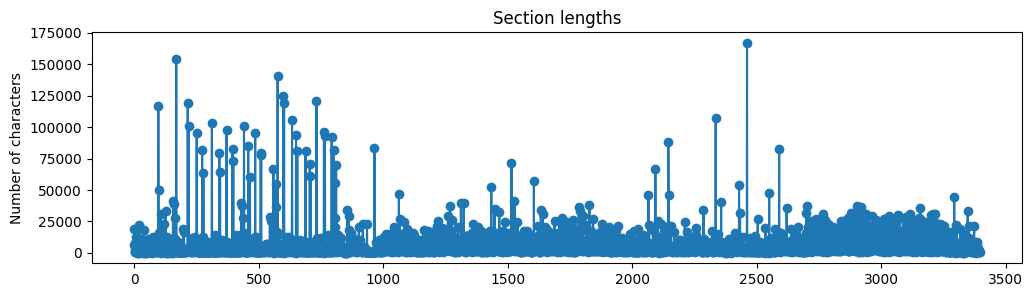

In [17]:
# Plot
plt.figure(figsize=(12, 3))
plt.plot(sections_df['length'], marker='o')
plt.title("Section lengths")
plt.ylabel("Number of characters")
plt.show()

### Chunking 

In [18]:
from functools import partial
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [19]:
# Text splitter
chunk_size = 1000
chunk_overlap = 100
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len)

In [20]:
sample_section = sections_df[sections_df['source'].str.\
startswith('https://scikit-learn.org/stable/governance.html#scikit-learn-governance-and-decision-making')].to_dict()

print(f"Source : {list(sample_section['source'].values())[0]}\n")
print(f"Text: \n\n{list(sample_section['text'].values())[0][:300]}")

Source : https://scikit-learn.org/stable/governance.html#scikit-learn-governance-and-decision-making

Text: 

#  Scikit-learn governance and decision-making [ ¶ ](governance.html#scikit-
learn-governance-and-decision-making "Link to this heading")

The purpose of this document is to formalize the governance process used by
the scikit-learn project, to clarify how decisions are made and how the
various eleme


In [21]:
# Chunk a sample section
sample_section = all_sections[32]
chunks = text_splitter.create_documents(
    texts=[sample_section["text"]], 
    metadatas=[{"source": sample_section["source"]}])

In [22]:
for chunk in chunks:
    print(chunk.metadata)
    print(chunk.page_content)
    print("--"*70)

{'source': 'https://scikit-learn.org/stable/common_pitfalls.html#id3'}
####  10.3.2.2.  CV splitters [ ¶ ](common_pitfalls.html#id3 "Link to this
heading")

When passed a ` RandomState  ` instance, CV splitters yield different splits
each time ` split  ` is called. When comparing different estimators, this can
lead to overestimating the variance of the difference in performance between
the estimators:

[code]
--------------------------------------------------------------------------------------------------------------------------------------------
{'source': 'https://scikit-learn.org/stable/common_pitfalls.html#id3'}
[code]

    >>> from sklearn.naive_bayes import GaussianNB
    >>> from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    >>> from sklearn.datasets import make_classification
    >>> from sklearn.model_selection import KFold
    >>> from sklearn.model_selection import cross_val_score
    >>> import numpy as np
    
    >>> rng = np.random.RandomState(0)
 

In [23]:
def chunk_section(section, chunk_size, chunk_overlap):
    text_splitter = RecursiveCharacterTextSplitter(
        separators=["\n\n", "\n", " ", ""],
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len)
    
    chunks = text_splitter.create_documents(
        texts=[section["text"]], 
        metadatas=[{"source": section["source"]}])
    return [{"text": chunk.page_content, "source": chunk.metadata["source"]} for chunk in chunks]

In [24]:
chunk_function = partial(chunk_section, chunk_size=chunk_size, chunk_overlap=chunk_overlap)

chunks = list()
for section in tqdm(all_sections):
    for chunk in chunk_function(section):
        chunks.append(chunk)

chunks_count = len(chunks)
print(f"{chunks_count} chunks")

100%|█████████████████████████████████████| 3396/3396 [00:00<00:00, 8495.40it/s]

30849 chunks


## Embedding the data

In [1]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
import numpy as np

In [26]:
def get_embedding_model(embedding_model_name, model_kwargs, encode_kwargs):
    if embedding_model_name == "text-embedding-ada-002":
        embedding_model = OpenAIEmbeddings(
            model=embedding_model_name,
            openai_api_key=os.environ["OPENAI_API_KEY"])
    else:
        embedding_model = HuggingFaceEmbeddings(
            model_name=embedding_model_name,
            model_kwargs=model_kwargs,
            encode_kwargs=encode_kwargs)
    return embedding_model

In [27]:
class EmbedChunks:
    def __init__(self, model_name):
        self.embedding_model = get_embedding_model(
            embedding_model_name=model_name,
            model_kwargs={"device": "cpu"},
            encode_kwargs={"device": "cpu", "batch_size": 100})

    def __call__(self, batch):
        texts = [chunk["text"] for chunk in batch]
        embeddings = self.embedding_model.embed_documents(texts)
        for i, chunk in enumerate(batch):
            chunk["embeddings"] = embeddings[i]
        
        return batch

In [28]:
embedding_model_name = "thenlper/gte-base"
embedder = EmbedChunks(model_name=embedding_model_name)

# Processing chunks in batches
batch_size = 100
embedded_chunks = []
for i in tqdm(range(0, len(chunks), batch_size)):
    batch = chunks[i:i+batch_size]
    embedded_batch = embedder(batch)
    embedded_chunks.extend(embedded_batch)

100%|███████████████████████████████████████| 309/309 [1:02:01<00:00, 12.04s/it]


In [36]:
embedded_chunks[0]

{'text': '#  Related Projects [ ¶ ](related_projects.html#related-projects "Link to this\nheading")\n\nProjects implementing the scikit-learn estimator API are encouraged to use the\n[ scikit-learn-contrib template ](https://github.com/scikit-learn-\ncontrib/project-template) which facilitates best practices for testing and\ndocumenting estimators. The [ scikit-learn-contrib GitHub organization\n](https://github.com/scikit-learn-contrib/scikit-learn-contrib) also accepts\nhigh-quality contributions of repositories conforming to this template.\n\nBelow is a list of sister-projects, extensions and domain specific packages.\n\n##  Interoperability and framework enhancements [ ¶\n](related_projects.html#interoperability-and-framework-enhancements "Link to\nthis heading")\n\nThese tools adapt scikit-learn for use with other technologies or otherwise\nenhance the functionality of scikit-learn’s estimators.\n\n**Data formats**',
 'source': 'https://scikit-learn.org/stable/related_projects.htm

### Saving the embeddings locally

In [68]:
import json

embedding_json = json.dumps(embedded_chunks, indent=4) 
file_name = 'gte-base_embedded_chunks.json'

with open(file_name, 'w') as file:
    file.write(embedding_json)

### Loading the saved embeddings

In [72]:
# file_name = 'gte-base_embedded_chunks.json'

# with open(file_name, 'r') as file:
#     embedding_chunks = json.load(file)

# print(embedding_chunks[0])

### Upserting embeddings to Pinecone

In [37]:
from pinecone import Pinecone, PodSpec

pc = Pinecone(api_key=os.environ["PINECONE_API_KEY"])

pc.create_index(
  name="scikit-learn-docs-embeddings",
  dimension=768,
  metric="cosine",
  spec=PodSpec(
    environment="gcp-starter"
  )
)

In [41]:
index = pc.Index("scikit-learn-docs-embeddings")

In [42]:
upsert_data = [
    (str(i), chunk["embeddings"], {"text": chunk["text"], "source": chunk["source"]})
    for i, chunk in enumerate(embedded_chunks)
]

In [43]:
batch_size = 100 
for i in range(0, len(upsert_data), batch_size):
    batch = upsert_data[i:i+batch_size]
    index.upsert(vectors=batch)

In [47]:
index.describe_index_stats()

{'dimension': 768,
 'index_fullness': 0.30849,
 'namespaces': {'': {'vector_count': 30849}},
 'total_vector_count': 30849}

### Retrieval

In [61]:
import json
import numpy as np

# Embed query
embedding_model = HuggingFaceEmbeddings(model_name=embedding_model_name)
query = "What is PCA and provide an example on how to work with PCA class?"
embedding = np.array(embedding_model.embed_query(query))

In [62]:
embedding

array([ 2.30997987e-02, -7.19917053e-03, -2.22322112e-03,  3.28705795e-02,
        5.84024675e-02,  1.58861466e-02,  4.51665372e-02,  2.74333730e-02,
       -2.00406462e-02, -6.38588965e-02, -1.44175133e-02, -3.21331056e-04,
       -8.07447135e-02,  3.20338383e-02, -9.56501754e-06,  3.82372364e-02,
        5.99998012e-02,  4.23323782e-03,  2.18034368e-02,  3.55791561e-02,
       -2.15201173e-02,  1.49697512e-02,  2.71634478e-02,  3.35115865e-02,
        2.16631107e-02, -5.67897828e-03,  3.56353857e-02,  2.12624725e-02,
       -6.85229227e-02,  1.12146139e-02,  2.57366188e-02, -1.13328770e-02,
        1.47125293e-02, -2.38201488e-02, -6.94715790e-03, -2.28490513e-02,
        4.58069285e-03, -5.01688628e-04, -1.21302065e-02, -5.29447151e-03,
       -2.39495933e-02, -2.38550752e-02, -1.74975190e-02,  1.03682093e-02,
       -2.54124794e-02, -2.14354205e-03, -7.00961873e-02,  3.61366421e-02,
       -8.76676757e-04, -4.43326356e-03, -4.51774411e-02,  5.97839020e-02,
        2.33163461e-02,  

In [65]:
result = index.query(
    vector=embedding.tolist(),
    top_k=10,
    include_values=True,
    include_metadata=True
)

In [66]:
for i, row in enumerate(result['matches']):
    metadata = row['metadata']
    score = row['score']
    print(i+1)
    print(f"Similarity score : {score}")
    print("--"*70)
    print(f"Source : {metadata['source']}")
    print("--"*70)
    print(f"Relevant Text : \n {metadata['text']}")

1
Similarity score : 0.908245206
--------------------------------------------------------------------------------------------------------------------------------------------
Source : https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#pca-example-with-iris-data-set
--------------------------------------------------------------------------------------------------------------------------------------------
Relevant Text : 
 #  PCA example with Iris Data-set [ ¶ ](plot_pca_iris.html#pca-example-with-
iris-data-set "Link to this heading")

Principal Component Analysis applied to the Iris dataset.

See [ here ](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more
information on this dataset.

![plot pca iris](../../_images/sphx_glr_plot_pca_iris_001.png)

[code]
2
Similarity score : 0.894136786
--------------------------------------------------------------------------------------------------------------------------------------------
Source : https://scikit-